In [89]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
from scipy.stats import skew

import matplotlib.pyplot as plt

In [90]:
#Reading the data file
data= pd.read_csv("winemag-data_first150k.csv")

In [91]:
#checking the shape
data.shape

(150930, 11)

In [92]:
#Here I am sepearting the numerical and text features which can give us idea that whether how much data we need to change
numerical_features   = data.select_dtypes(include = [np.number]).columns
categorical_features = data.select_dtypes(include= [np.object]).columns

In [93]:
numerical_features

Index(['Unnamed: 0', 'points', 'price'], dtype='object')

In [94]:
categorical_features

Index(['country', 'description', 'designation', 'province', 'region_1',
       'region_2', 'variety', 'winery'],
      dtype='object')

In [95]:
#To check top content of the dataframe, Here we can pass some integer value to the data head and it can print that much output 
#like data.head(10)
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [96]:
# remove the first column which was not required axis was specified so that it delete column default axis is 0 that is row
#if you want to remove the first and second row than it is considered row deletion and we could have used data.drop([1,2],axis=0)
data=data.drop(labels='Unnamed: 0',axis=1)



In [97]:
data

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


[]

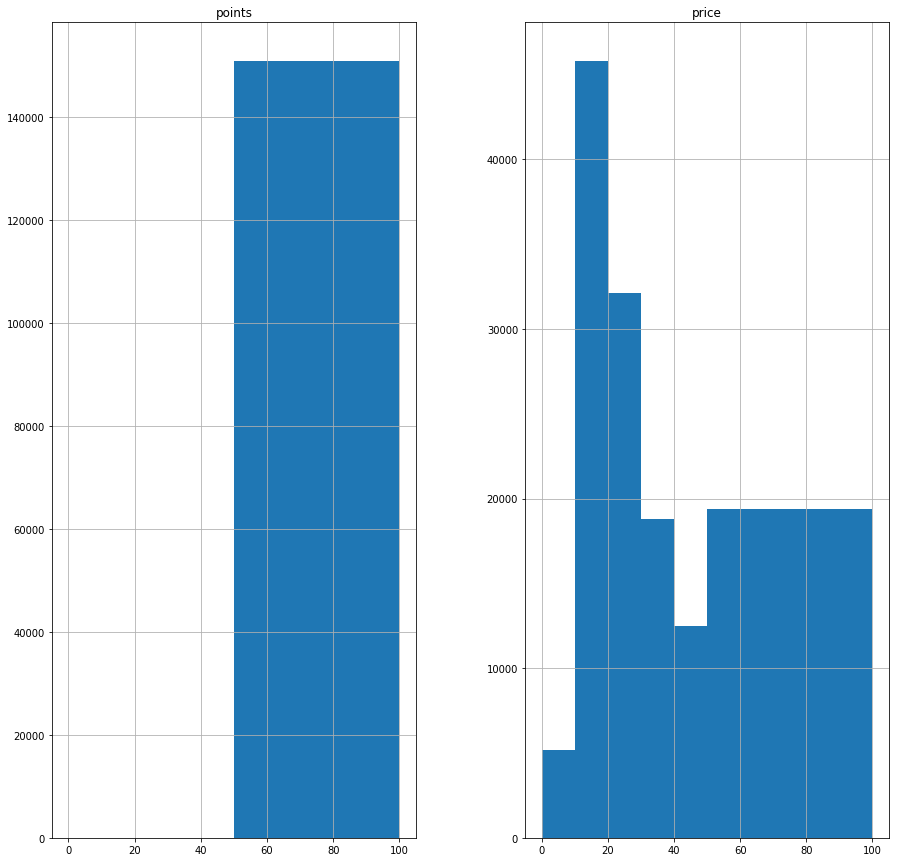

In [98]:
#hist can take all the numerical columns of the data and plot them into a histogram 
data.hist(figsize=(15,15),bins=[0, 10, 20, 30, 40, 50, 100])
plt.plot()

In [100]:
#Select only selected column df1 = df[['a','b']]
# Due to limited time here I am only considering numerical features of the dataset
UpdatedDataFrame=data[['country','points','price']]

In [101]:
UpdatedDataFrame

,country,points,price
0,US,96,235.0
1,Spain,96,110.0
2,US,96,90.0
3,US,96,65.0
4,France,95,66.0
5,Spain,95,73.0
6,Spain,95,65.0
7,Spain,95,110.0
8,US,95,65.0
9,US,95,60.0


In [102]:
#Here I am checking the null values and removing those from the dataframe
missing_values = UpdatedDataFrame.isnull().sum().sort_values(ascending = False)

In [103]:
missing_values

price      13695
country        5
points         0
dtype: int64

In [104]:
# removing any row that contains null value , you can explicitly change this to specific column also df = 
#df.dropna(axis=0,subset=['column_name']) also you can replace the
#df['Charge_Per_Line'] = df['Charge_Per_Line'].replace('-', np.nan)
UpdatedDataFrame = UpdatedDataFrame.dropna(axis=0)

In [105]:
UpdatedDataFrame.shape

(137230, 3)

In [107]:
# Here we have a dataset that have categorical data we can convert that into numerical format which can help us to make our 
#analysis easy
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(UpdatedDataFrame['country'])
le.classes_
UpdatedDataFrame['countryNumerical']=le.transform(UpdatedDataFrame['country'])

UpdatedDataFrame

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,country,points,price,countryNumerical
0,US,96,235.0,42
1,Spain,96,110.0,39
2,US,96,90.0,42
3,US,96,65.0,42
4,France,95,66.0,14
5,Spain,95,73.0,39
6,Spain,95,65.0,39
7,Spain,95,110.0,39
8,US,95,65.0,42
9,US,95,60.0,42


In [112]:
#Select only selected column df1 = df[['a','b']]
NumericalDataFrame=UpdatedDataFrame[['points','price','countryNumerical']]

In [115]:
#Seperating out the output from the input
output=NumericalDataFrame[['price']]

In [114]:
#With this command we can list all the possible methods that we can use. Ignore __ and _  
print(dir(NumericalDataFrame))

['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rsub__

In [124]:
#As output has been already taken we can drop the price from the dataframe
#NumericalDataFrame.drop('price',axix=0)
NumericalDataFrame=NumericalDataFrame.drop(labels='price',axis=1)

In [137]:
# Splitting the data into test and train and using sklearn decesion tree to test the outcome
from sklearn import tree
clf = tree.DecisionTreeClassifier()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NumericalDataFrame, output, test_size=0.20, random_state=42)

In [138]:
#Fitting the model by passing Training set which was created in the last step
clf=clf.fit(X_train, y_train)

In [139]:
#prediction is use to predict the test dataframe
predictions = clf.predict(X_test)

In [140]:
#Checking first 5 values of the predicted output
predictions[0:5]

array([20., 50., 24., 20., 20.])

Text(0,0.5,'Predictions')

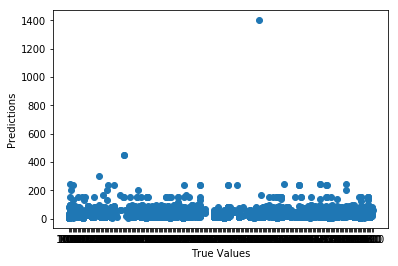

In [141]:
#Plotting the model value with the actual test data values
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [142]:
#testing the score
clf.score(X_test,y_test)

0.0835094367120892